In [1]:
#import necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing

# gathering and processing of data
data = pd.read_csv('spam.csv',encoding='latin-1')
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v1":'label', "v2":'text'})
print(data.head())

  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [2]:
#Analyzing of the data
data.columns=['category', 'message']
data.head()

,category,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
#Analyzing of the data
data.category.value_counts()

ham     4825
spam     747
Name: category, dtype: int64

C:\Users\jmval\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


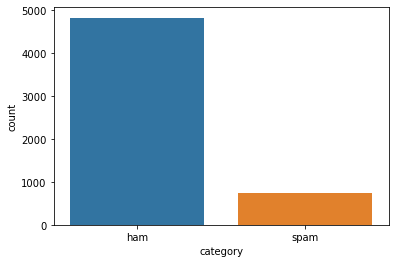

In [4]:
#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.countplot(data.category)
plt.show()

In [5]:
#checking of missing values
data.isnull().sum()

category    0
message     0
dtype: int64

In [6]:
# Preparing of the data
data_spam  = data[data.category == 'spam'].copy()
data_ham = data[data.category == 'ham'].copy()

def generate_wordcloud(data_frame, category):
    text = ' '.join(data_frame['message'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='lightgrey',
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(category, fontsize=20 )
    plt.show()

In [7]:
#converting category into numerical data wherein spam = 1 and ham = 0
data['category'] = data['category'].map( 
    {'spam': 1, 'ham': 0} )

data.head()

,category,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# Splitting of the data into train and test set

from sklearn.model_selection import train_test_split

X = data['message'].values
y = data['category'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [9]:
# importing libraries of keras to preprocess the data

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

token = Tokenizer() #procesing of text into phrase, words, etc.
token.fit_on_texts(X_train) #fitting of the message

In [10]:
# applying sequences from the dictionary on both training and test dataset

enco_train = token.texts_to_sequences(X_train)
enco_test = token.texts_to_sequences(X_test)
print(enco_train[0:2])

[[38, 30, 8, 5, 273, 1989, 81, 116, 26, 11, 1656, 322, 10, 53, 18, 299, 30, 349, 1990], [799, 15, 2555, 1442, 1127, 192, 2556, 171, 12, 98, 1991, 44, 195, 1657, 2557, 1992, 2558, 21, 9, 4, 203, 1025, 225]]


In [11]:
# applying 8 words padding to training and test dataset

max_length = 8

pad_train = pad_sequences(enco_train, maxlen = max_length, padding = 'post')
pad_test = pad_sequences(enco_test, maxlen = max_length, padding = 'post')

print(pad_train)

[[ 322   10   53 ...   30  349 1990]
 [1992 2558   21 ...  203 1025  225]
 [  83 1443    4 ...    2 3794 3795]
 ...
 [1477   30 2063 ...  239   30 2064]
 [ 763 1679 1161 ...    0    0    0]
 [   8  155   20 ...    8  290  175]]


In [12]:
#choosing a model
# importing libraries for model building

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import EarlyStopping

In [13]:
vocab_size = len(token.word_index) + 1

# creating a model 

mod = Sequential()
mod.add(Embedding(vocab_size, 24, input_length = max_length))
mod.add(Flatten())
mod.add(Dense(500, activation='relu'))
mod.add(Dense(200, activation='relu'))
mod.add(Dropout(0.5))
mod.add(Dense(100, activation='relu'))
mod.add(Dense(1, activation='sigmoid'))

# compile the model
mod.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

# summarize the model
print(mod.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 8, 24)             190920    
                                                                 
 flatten (Flatten)           (None, 192)               0         
                                                                 
 dense (Dense)               (None, 500)               96500     
                                                                 
 dense_1 (Dense)             (None, 200)               100200    
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 1)                 1

In [ ]:
#Training of the model
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# fit the model
mod.fit(x=pad_train,
         y=y_train,
         epochs=20,
                 )

Epoch 1/20
140/140 [==============================] - 1s 3ms/step - loss: 0.1910 - accuracy: 0.9266
Epoch 2/20
140/140 [==============================] - 0s 3ms/step - loss: 0.0421 - accuracy: 0.9872
Epoch 3/20
140/140 [==============================] - 0s 3ms/step - loss: 0.0136 - accuracy: 0.9964
Epoch 4/20
140/140 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 0.9996
Epoch 5/20
140/140 [==============================] - 0s 3ms/step - loss: 7.2101e-05 - accuracy: 1.0000
Epoch 6/20
103/140 [=====================>........] - ETA: 0s - loss: 2.0514e-07 - accuracy: 1.0000

In [ ]:
#Evaluation of the model
from sklearn.metrics import confusion_matrix, accuracy_score

output = (mod.predict(pad_test) > 0.5).astype("int32").tolist()
output

In [ ]:
#saving the model and import pickle for transport of the data
mod.save("spam_detection_model")

import pickle

with open('spam_detection_model/tokenizer.pkl', 'wb') as output:
   pickle.dump(token, output, pickle.HIGHEST_PROTOCOL)

In [ ]:
#load the previous model
import tensorflow as tf

model = tf.keras.models.load_model("spam_detection_model")
with open('spam_detection_model/tokenizer.pkl', 'rb') as input:
    tokenizer = pickle.load(input)

In [ ]:
#importing another csv file to test the prediction of data
sms = pd.read_csv('output_spam.csv',encoding='latin-1')
sms.columns=['category', 'textx']
z = sms['textx'].values
sms.head()


In [ ]:
#predicting of the data
sms_proc = token.texts_to_sequences(z)
sms_proc = pad_sequences(sms_proc, maxlen=max_length, padding='post')
pred = (model.predict(sms_proc) > 0.5).astype("int32").tolist()
pred

In [ ]:
prediction_output = pd.DataFrame( pred , columns = ['Output prediction']).to_csv('Valad-on_spam_output.csv')